In [5]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
import warnings
warnings.filterwarnings('ignore')

In [6]:
dt_clf=DecisionTreeClassifier(random_state=156)

In [9]:
iris_data=load_iris()
X_train,X_test,y_train,y_test=train_test_split(iris_data.data,iris_data.target,test_size=0.2,random_state=11)

In [10]:
dt_clf.fit(X_train,y_train)

DecisionTreeClassifier(random_state=156)

In [11]:
from sklearn.tree import export_graphviz

In [19]:
#export_graphviz()의 호출 결과로 out_filr로 지정된 tree.dot파일 생성
export_graphviz(dt_clf,out_file="tree.dot",class_names=iris_data.target_names,feature_names=iris_data.feature_names,impurity=True,filled=True)

In [24]:
import graphviz

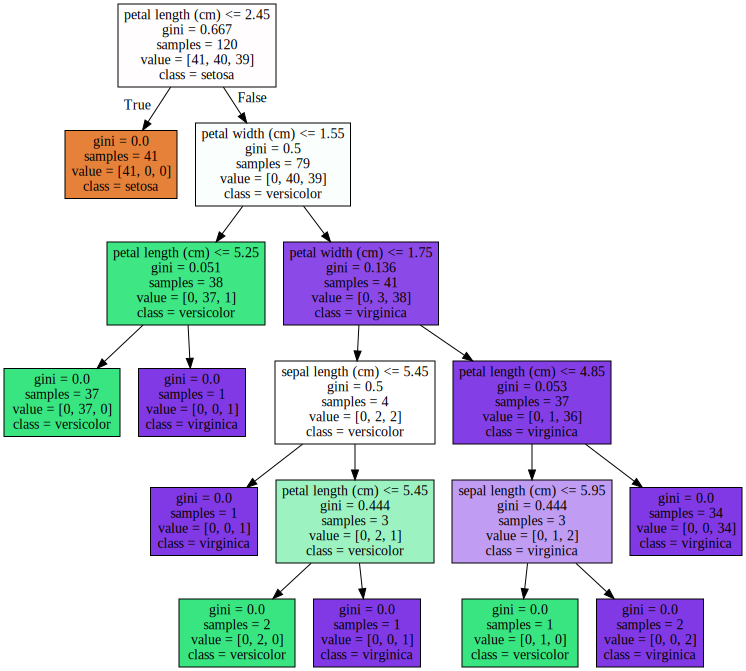

In [25]:
#색깔이 짙어질수록 지니계수가 낮고 해당 레이블에 속하는 샘플데이터가 많다는 의미
with open('tree.dot') as f:
    dot_graph=f.read()
    
graphviz.Source(dot_graph)

In [27]:
dt_clf2=DecisionTreeClassifier(random_state=156,max_depth=3)
dt_clf2.fit(X_train,y_train)

DecisionTreeClassifier(max_depth=3, random_state=156)

In [29]:
export_graphviz(dt_clf2,out_file="tree2.dot",class_names=iris_data.target_names,feature_names=iris_data.feature_names,impurity=True,filled=True)

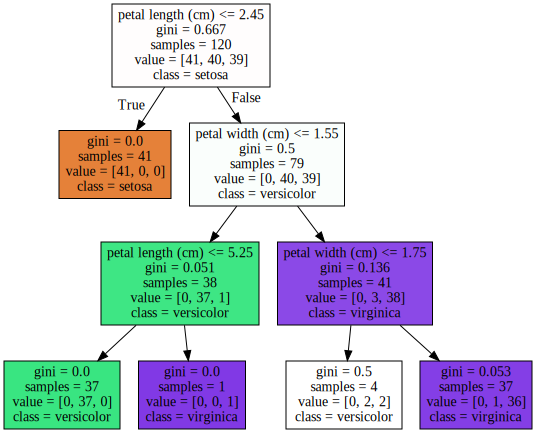

In [30]:
with open('tree2.dot') as f:
    dot_graph2=f.read()
    
graphviz.Source(dot_graph2)

In [31]:
dt_clf3=DecisionTreeClassifier(random_state=156,min_samples_split=4)
dt_clf3.fit(X_train,y_train)

DecisionTreeClassifier(min_samples_split=4, random_state=156)

In [32]:
export_graphviz(dt_clf3,out_file='tree3.dot',class_names=iris_data.target_names,feature_names=iris_data.feature_names,impurity=True,filled=True)

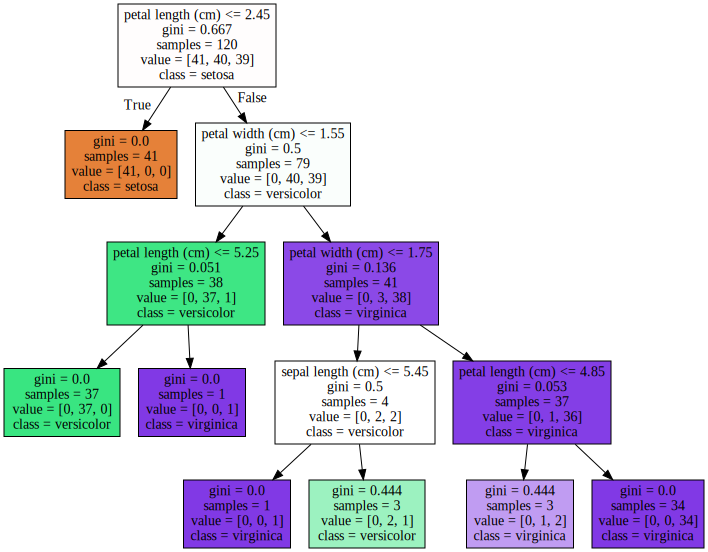

In [33]:
with open('tree3.dot') as f:
    dot_graph3=f.read()
graphviz.Source(dot_graph3)

In [44]:
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [36]:
#feature importance 추출
print('Feature importances:',np.round(dt_clf.feature_importances_,3))

Feature importances: [0.025 0.    0.555 0.42 ]


In [40]:
#feature별 importance 매핑
for name,value in zip(iris_data.feature_names,dt_clf.feature_importances_):
    print('{0}:{1}'.format(name,value))

sepal length (cm):0.02500520941862888
sepal width (cm):0.0
petal length (cm):0.5549028149313102
petal width (cm):0.42009197565006084


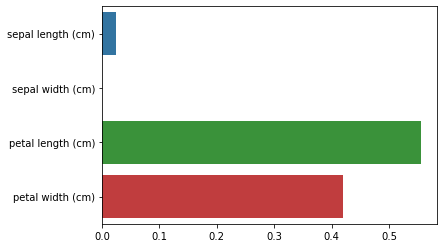

In [41]:
sns.barplot(x=dt_clf.feature_importances_,y=irid_data.feature_names)

In [42]:
from sklearn.datasets import make_classification

In [43]:
X_features,y_labels=make_classification(n_features=2,n_redundant=0,n_informative=2,n_classes=3,
                                       n_clusters_per_class=1,random_state=0)

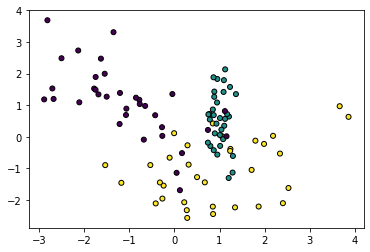

In [49]:
plt.scatter(X_features[:,0],X_features[:,1],marker='o',c=y_labels,s=25,edgecolors='k')

In [50]:
#머신러닝 모델이 클래스 값을 예측하는 결정기준을 색상과 경계로 나타내 모델이 어떻게 데이터 세트
#를 예측 분류하는지 잘 이해할 수 있게 해줌

dt_clf=DecisionTreeClassifier().fit(X_features,y_labels)
visualize_boundary(dt_clf,X_features,y_labels)

NameError: name 'visualize_boundary' is not defined

In [52]:
import pandas as pd

In [57]:
feature_name_df=pd.read_csv(r'C:\Users\PC\Downloads\UCI HAR Dataset\human_activity\features.txt',sep='\s+',
           header=None,names=['column_index','column_name'])

In [61]:
#피처명 index를 제거하고 피처명만 리스트 객체로 생성한 뒤 샘플로 10개만 추출
feature_name=feature_name_df.iloc[:,1].values.tolist()
feature_name[:10]

['tBodyAcc-mean()-X',
 'tBodyAcc-mean()-Y',
 'tBodyAcc-mean()-Z',
 'tBodyAcc-std()-X',
 'tBodyAcc-std()-Y',
 'tBodyAcc-std()-Z',
 'tBodyAcc-mad()-X',
 'tBodyAcc-mad()-Y',
 'tBodyAcc-mad()-Z',
 'tBodyAcc-max()-X']

In [84]:
def get_new_feature_name_df(old_feature_name_df):
    feature_dup_df = pd.DataFrame(data=old_feature_name_df.groupby('column_name').cumcount(), columns=['dup_cnt'])
    feature_dup_df = feature_dup_df.reset_index()
    new_feature_name_df = pd.merge(old_feature_name_df.reset_index(), feature_dup_df, how='outer')
    new_feature_name_df['column_name'] = new_feature_name_df[['column_name', 'dup_cnt']].apply(lambda x : x[0]+'_'+str(x[1]) 
                                                                                           if x[1] >0 else x[0] ,  axis=1)
    new_feature_name_df = new_feature_name_df.drop(['index'], axis=1)
    return new_feature_name_df

In [85]:
pd.options.display.max_rows = 999
new_feature_name_df = get_new_feature_name_df(feature_name_df)
new_feature_name_df[new_feature_name_df['dup_cnt'] > 0]

,column_index,column_name,dup_cnt
316,317,"fBodyAcc-bandsEnergy()-1,8_1",1
317,318,"fBodyAcc-bandsEnergy()-9,16_1",1
318,319,"fBodyAcc-bandsEnergy()-17,24_1",1
319,320,"fBodyAcc-bandsEnergy()-25,32_1",1
320,321,"fBodyAcc-bandsEnergy()-33,40_1",1
321,322,"fBodyAcc-bandsEnergy()-41,48_1",1
322,323,"fBodyAcc-bandsEnergy()-49,56_1",1
323,324,"fBodyAcc-bandsEnergy()-57,64_1",1
324,325,"fBodyAcc-bandsEnergy()-1,16_1",1
325,326,"fBodyAcc-bandsEnergy()-17,32_1",1


In [88]:
def get_human_dataset( ):
    
    # 각 데이터 파일들은 공백으로 분리되어 있으므로 read_csv에서 공백 문자를 sep으로 할당.
    feature_name_df = pd.read_csv('./human_activity/features.txt',sep='\s+',
                        header=None,names=['column_index','column_name'])
    
    # 중복된 feature명을 새롭게 수정하는 get_new_feature_name_df()를 이용하여 새로운 feature명 DataFrame생성. 
    new_feature_name_df = get_new_feature_name_df(feature_name_df)
    
    # DataFrame에 피처명을 컬럼으로 부여하기 위해 리스트 객체로 다시 변환
    feature_name = new_feature_name_df.iloc[:, 1].values.tolist()
    
    # 학습 피처 데이터 셋과 테스트 피처 데이터을 DataFrame으로 로딩. 컬럼명은 feature_name 적용
    X_train = pd.read_csv('./human_activity/train/X_train.txt',sep='\s+', names=feature_name )
    X_test = pd.read_csv('./human_activity/test/X_test.txt',sep='\s+', names=feature_name)
    
    # 학습 레이블과 테스트 레이블 데이터을 DataFrame으로 로딩하고 컬럼명은 action으로 부여
    y_train = pd.read_csv('./human_activity/train/y_train.txt',sep='\s+',header=None,names=['action'])
    y_test = pd.read_csv('./human_activity/test/y_test.txt',sep='\s+',header=None,names=['action'])
    
    # 로드된 학습/테스트용 DataFrame을 모두 반환 
    return X_train, X_test, y_train, y_test


X_train, X_test, y_train, y_test = get_human_dataset()

In [89]:
X_train,X_test,y_train,y_test=get_human_dataset()
X_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7352 entries, 0 to 7351
Columns: 561 entries, tBodyAcc-mean()-X to angle(Z,gravityMean)
dtypes: float64(561)
memory usage: 31.5 MB


In [81]:
dt_clf.get_params()

{'ccp_alpha': 0.0,
 'class_weight': None,
 'criterion': 'gini',
 'max_depth': None,
 'max_features': None,
 'max_leaf_nodes': None,
 'min_impurity_decrease': 0.0,
 'min_impurity_split': None,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'presort': 'deprecated',
 'random_state': None,
 'splitter': 'best'}

In [124]:
from sklearn.model_selection import GridSearchCV
params={'max_depth':[6,8,10,12,16,20,24]}
dt_clf=DecisionTreeClassifier(random_state=0)
grid_cv=GridSearchCV(dt_clf,param_grid=params,scoring='accuracy',cv=5,verbose=1)
grid_cv.fit(X_train,y_train)
print('GridSearchCV 최고 평균 정확도 수치:{0:.4f}'.format(grid_cv.best_score_))
print('GridSearchCV 최적 하이퍼 파라미터:', grid_cv.best_params_)

Fitting 5 folds for each of 7 candidates, totalling 35 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done  35 out of  35 | elapsed:  1.3min finished


GridSearchCV 최고 평균 정확도 수치:0.8481
GridSearchCV 최적 하이퍼 파라미터: {'max_depth': 10}


In [125]:
cv_results_df = pd.DataFrame(grid_cv.cv_results_)
cv_results_df[['param_max_depth', 'mean_test_score']]


,param_max_depth,mean_test_score
0,6,0.842084
1,8,0.847532
2,10,0.848078
3,12,0.842230
4,16,0.843862
5,20,0.844134
6,24,0.842231


In [126]:
best=grid_cv.best_estimator_
pred1=best.predict(X_test)
print('결정트리 예측 정확도:',accuracy_score(y_test,pred1))

결정트리 예측 정확도: 0.8591788259246692


In [128]:
dt_clf1=DecisionTreeClassifier(max_depth=10,random_state=0)
dt_clf1.fit(X_train,y_train)
pred0=dt_clf1.predict(X_test)
accuracy_score(y_test,pred0)

0.8591788259246692

In [96]:
from sklearn.metrics import accuracy_score

In [99]:
max_depth=[6,8,10,12,16,20,24]
for depth in max_depth:
    dt_clf=DecisionTreeClassifier(max_depth=depth,random_state=156)
    dt_clf.fit(X_train,y_train)
    pred=dt_clf.predict(X_test)
    accuracy=accuracy_score(y_test,pred)
    print('mex_depth:{0} 정확도:{1}'.format(depth,accuracy))

mex_depth:6 정확도:0.8557855446216491
mex_depth:8 정확도:0.8707159823549372
mex_depth:10 정확도:0.8673227010519172
mex_depth:12 정확도:0.8646080760095012
mex_depth:16 정확도:0.8574821852731591
mex_depth:20 정확도:0.8547675602307431
mex_depth:24 정확도:0.8547675602307431


In [104]:
from sklearn.ensemble import VotingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.datasets import load_breast_cancer

In [106]:
cancer=load_breast_cancer()
data_df=pd.DataFrame(cancer.data,columns=cancer.feature_names)

In [110]:
data_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 30 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   mean radius              569 non-null    float64
 1   mean texture             569 non-null    float64
 2   mean perimeter           569 non-null    float64
 3   mean area                569 non-null    float64
 4   mean smoothness          569 non-null    float64
 5   mean compactness         569 non-null    float64
 6   mean concavity           569 non-null    float64
 7   mean concave points      569 non-null    float64
 8   mean symmetry            569 non-null    float64
 9   mean fractal dimension   569 non-null    float64
 10  radius error             569 non-null    float64
 11  texture error            569 non-null    float64
 12  perimeter error          569 non-null    float64
 13  area error               569 non-null    float64
 14  smoothness error         5

### soft voting

In [111]:
lr_clf=LogisticRegression()
knn_clf=KNeighborsClassifier(n_neighbors=8)

In [113]:
vo_clf=VotingClassifier(estimators=[('LR',lr_clf),('KNN',knn_clf)],voting='soft')

In [114]:
X_train,X_test,y_train,y_test=train_test_split(cancer.data,cancer.target,test_size=0.2,random_state=156)

In [115]:
vo_clf.fit(X_train,y_train)
pred=vo_clf.predict(X_test)
print('Voting분류기 정확도:',accuracy_score(y_test,pred))

Voting분류기 정확도: 0.9473684210526315


In [116]:
#개별 모델의 학습/예측/평가
classifiers=[lr_clf,knn_clf]
for i in classifiers:
    i.fit(X_train,y_train)
    pred=i.predict(X_test)
    class_name=i.__class__.__name__
    print('{0} 정확도:{1}'.format(class_name,accuracy_score(y_test,pred)))

LogisticRegression 정확도:0.9385964912280702
KNeighborsClassifier 정확도:0.9385964912280702


### Bagging (RandomForest)

In [117]:
from sklearn.ensemble import RandomForestClassifier

In [118]:
X_train,X_test,y_train,y_test=get_human_dataset()

In [119]:
rf_clf=RandomForestClassifier(random_state=0)
rf_clf.fit(X_train,y_train)
pred2=rf_clf.predict(X_test)
print('랜덤포레스트 정확도:',accuracy_score(y_test,pred2))

랜덤포레스트 정확도: 0.9253478113335596


In [121]:
#랜덤포레스트 하이퍼 파라미터 및 튜닝
from sklearn.model_selection import GridSearchCV

params={'n_estimators':[100],'max_depth':[6,8,10,12],'min_samples_leaf':[8,12,18],'min_samples_split':[8,16,20]}

rf_clf=RandomForestClassifier(random_state=0,n_jobs=-1)
grid_cv1=GridSearchCV(rf_clf,param_grid=params,cv=2,n_jobs=-1)
grid_cv1.fit(X_train,y_train)

print('최적의 하이퍼파라미터:',grid_cv1.best_params_)
print('최고 예측 정확도:',grid_cv1.best_score_)

최적의 하이퍼파라미터: {'max_depth': 10, 'min_samples_leaf': 8, 'min_samples_split': 8, 'n_estimators': 100}
최고 예측 정확도: 0.9179815016322089


In [122]:
rf_clf1=RandomForestClassifier(n_estimators=300,max_depth=10,min_samples_leaf=8,min_samples_split=8,
                              random_state=0)
rf_clf1.fit(X_train,y_train)
pred3=rf_clf1.predict(X_test)
print('예측 정확도:',accuracy_score(y_test,pred3))

예측 정확도: 0.9165252799457075


In [132]:
#피처 중요도 확인
ftr_importances=rf_clf1.feature_importances_
ftr_importance=pd.Series(ftr_importances,index=X_train.columns)
ftr_importance

tBodyAcc-mean()-X                       0.000077
tBodyAcc-mean()-Y                       0.000155
tBodyAcc-mean()-Z                       0.000075
tBodyAcc-std()-X                        0.007179
tBodyAcc-std()-Y                        0.000197
tBodyAcc-std()-Z                        0.000206
tBodyAcc-mad()-X                        0.003230
tBodyAcc-mad()-Y                        0.000322
tBodyAcc-mad()-Z                        0.000229
tBodyAcc-max()-X                        0.009043
tBodyAcc-max()-Y                        0.000133
tBodyAcc-max()-Z                        0.000132
tBodyAcc-min()-X                        0.000295
tBodyAcc-min()-Y                        0.000118
tBodyAcc-min()-Z                        0.000123
tBodyAcc-sma()                          0.000490
tBodyAcc-energy()-X                     0.004776
tBodyAcc-energy()-Y                     0.000266
tBodyAcc-energy()-Z                     0.000282
tBodyAcc-iqr()-X                        0.001955
tBodyAcc-iqr()-Y    

In [136]:
top20=ftr_importance.sort_values(ascending=False)[:20]

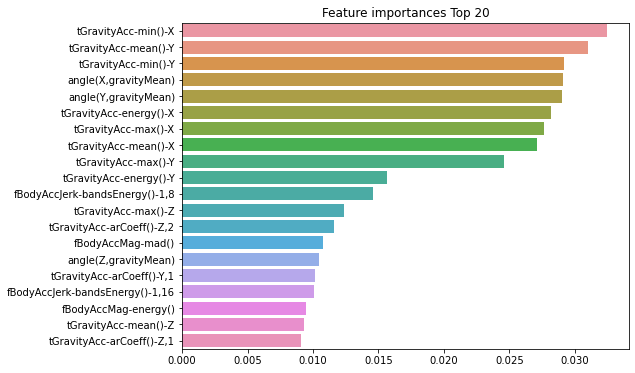

In [137]:
plt.figure(figsize=(8,6))
plt.title('Feature importances Top 20')
sns.barplot(x=top20,y=top20.index)
plt.show()

### GBM(Gradient Boosting Machine)

In [138]:
from sklearn.ensemble import GradientBoostingClassifier
import time

In [139]:
#GBM 수행 시간 측정을 위함, 시작 시간 설정
start_time=time.time()
gb_clf=GradientBoostingClassifier(random_state=0)
gb_clf.fit(X_train,y_train)
gb_pred=gb_clf.predict(X_test)
print('GBM정확도:',accuracy_score(y_test,gb_pred))
print('GBM수행시간:',time.time()-start_time)

GBM정확도: 0.9389209365456397
GBM수행시간: 548.391922712326


In [141]:
#GBM 하이퍼 파라미터 및 튜닝
params={'n_estimators':[100,500],'learning_rate':[0.05,0.1]}

grid_cv2=GridSearchCV(param_grid=params,cv=2,verbose=1)
grid_cv2.fit(X_train,y_train)
gb_pred2=grid_cv2.predict(X_test)
print('최적 하이퍼 파라미터:',grid_cv2.best_params_)
print('최고 예측 정확도:',grid_cv2.best_score_)

Fitting 2 folds for each of 4 candidates, totalling 8 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


KeyboardInterrupt: 

In [ ]:
gb_pred2=grid_cv.best_estimator_.predict(X_test)
print('GBM 정확도:',accuracy_score(y_test,gb_pred2))

### XGBoost

In [144]:
import xgboost as xgb
from xgboost import XGBClassifier,plot_importance
from sklearn.datasets import load_breast_cancer

In [160]:
dataset=load_breast_cancer()
X_features=dataset.data
y_label=dataset.target
print(X_features.shape)
print(y_label.shape)

(569, 30)
(569,)


In [152]:
cancer_df=pd.DataFrame(X_features,columns=dataset.feature_names)
cancer_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 30 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   mean radius              569 non-null    float64
 1   mean texture             569 non-null    float64
 2   mean perimeter           569 non-null    float64
 3   mean area                569 non-null    float64
 4   mean smoothness          569 non-null    float64
 5   mean compactness         569 non-null    float64
 6   mean concavity           569 non-null    float64
 7   mean concave points      569 non-null    float64
 8   mean symmetry            569 non-null    float64
 9   mean fractal dimension   569 non-null    float64
 10  radius error             569 non-null    float64
 11  texture error            569 non-null    float64
 12  perimeter error          569 non-null    float64
 13  area error               569 non-null    float64
 14  smoothness error         5

In [158]:
cancer_df['target']=y_label

In [162]:
cancer_df['target'].value_counts()

1    357
0    212
Name: target, dtype: int64

In [170]:
from xgboost import XGBClassifier
from sklearn.metrics import confusion_matrix,recall_score,precision_score,f1_score,roc_auc_score

xgb_wrapper=XGBClassifier(n_estimators=400,learning_rate=0.1,max_depth=3)

In [163]:
X_train,X_test,y_train,y_test=train_test_split(X_features,y_label,test_size=0.2,random_state=156)
print(X_train.shape,X_test.shape)

(455, 30) (114, 30)


In [171]:
xgb_wrapper.fit(X_train,y_train)
w_preds=xgb_wrapper.predict(X_test)

def get_clf_eval(y_test,pred):
    confusion=confusion_matrix(y_test,pred)
    accuracy=accuracy_score(y_test,pred)
    precision=precision_score(y_test,pred)
    recall=recall_score(y_test,pred)
    f1score=f1_score(y_test,pred)
    AUC=roc_auc_score(y_test,pred)
    print('오차행렬 :\n',confusion)
    print('정확도:{0}, 정밀도:{1}, 재현율 :{2}, f1스코어:{3}, AUC:{4}'.format(accuracy,precision,recall,f1score,AUC))
    
get_clf_eval(y_test,w_preds)

오차행렬 :
 [[35  2]
 [ 1 76]]
정확도:0.9736842105263158, 정밀도:0.9743589743589743, 재현율 :0.987012987012987, f1스코어:0.9806451612903225, AUC:0.9664794664794664


조기중단 관련한 파라미터를 fit()에 입력하면 된다.
    early_stopping_rounds : 반복 횟수를 정의함
    eval_metric : 조기중단을 위한 평가지표
    eval_set : 성능평가를 수행할 데이터 세트(학습데이터 세트가 아니라 별도의 데이터 세트)

In [175]:
xgb_wrapper2=XGBClassifier(n_estimators=400,learning_rate=0.1,max_depth=3)
evals=[(X_test,y_test)]
xgb_wrapper2.fit(X_train,y_train,early_stopping_rounds=100,eval_metric='logloss',eval_set=evals,verbose=True)
ws100_preds=xgb_wrapper2.predict(X_test)

ws100_pred_proba = xgb_wrapper.predict_proba(X_test)[:, 1]

[0]	validation_0-logloss:0.61352
Will train until validation_0-logloss hasn't improved in 100 rounds.
[1]	validation_0-logloss:0.54784
[2]	validation_0-logloss:0.49425
[3]	validation_0-logloss:0.44799
[4]	validation_0-logloss:0.40911
[5]	validation_0-logloss:0.37498
[6]	validation_0-logloss:0.34571
[7]	validation_0-logloss:0.32053
[8]	validation_0-logloss:0.29721
[9]	validation_0-logloss:0.27799
[10]	validation_0-logloss:0.26030
[11]	validation_0-logloss:0.24604
[12]	validation_0-logloss:0.23156
[13]	validation_0-logloss:0.22005
[14]	validation_0-logloss:0.20857
[15]	validation_0-logloss:0.19999
[16]	validation_0-logloss:0.19012
[17]	validation_0-logloss:0.18182
[18]	validation_0-logloss:0.17473
[19]	validation_0-logloss:0.16766
[20]	validation_0-logloss:0.15820
[21]	validation_0-logloss:0.15473
[22]	validation_0-logloss:0.14895
[23]	validation_0-logloss:0.14331
[24]	validation_0-logloss:0.13634
[25]	validation_0-logloss:0.13278
[26]	validation_0-logloss:0.12791
[27]	validation_0-loglo

[236]	validation_0-logloss:0.08629
[237]	validation_0-logloss:0.08622
[238]	validation_0-logloss:0.08639
[239]	validation_0-logloss:0.08634
[240]	validation_0-logloss:0.08618
[241]	validation_0-logloss:0.08619
[242]	validation_0-logloss:0.08625
[243]	validation_0-logloss:0.08626
[244]	validation_0-logloss:0.08629
[245]	validation_0-logloss:0.08622
[246]	validation_0-logloss:0.08640
[247]	validation_0-logloss:0.08635
[248]	validation_0-logloss:0.08628
[249]	validation_0-logloss:0.08645
[250]	validation_0-logloss:0.08629
[251]	validation_0-logloss:0.08631
[252]	validation_0-logloss:0.08636
[253]	validation_0-logloss:0.08639
[254]	validation_0-logloss:0.08649
[255]	validation_0-logloss:0.08644
[256]	validation_0-logloss:0.08629
[257]	validation_0-logloss:0.08646
[258]	validation_0-logloss:0.08639
[259]	validation_0-logloss:0.08644
[260]	validation_0-logloss:0.08646
[261]	validation_0-logloss:0.08649
[262]	validation_0-logloss:0.08644
[263]	validation_0-logloss:0.08647
[264]	validation_0-l

In [176]:
get_clf_eval(y_test,ws100_preds)

오차행렬 :
 [[34  3]
 [ 1 76]]
정확도:0.9649122807017544, 정밀도:0.9620253164556962, 재현율 :0.987012987012987, f1스코어:0.9743589743589742, AUC:0.9529659529659528


In [177]:
from lightgbm import LGBMClassifier

In [178]:
dataset=load_breast_cancer()
ftr=dataset.data
target=dataset.target

In [179]:
X_train,X_test,y_train,y_test=train_test_split(ftr,target,test_size=0.2,random_state=156)
lgbm_wrapper=LGBMClassifier(n_estimators=400)

evals=[(X_test,y_test)]
lgbm_wrapper.fit(X_train,y_train,early_stopping_rounds=100,eval_metric='logloss',eval_set=evals,verbose=True)

preds=lgbm_wrapper.predict(X_test)

[1]	valid_0's binary_logloss: 0.565079
Training until validation scores don't improve for 100 rounds
[2]	valid_0's binary_logloss: 0.507451
[3]	valid_0's binary_logloss: 0.458489
[4]	valid_0's binary_logloss: 0.417481
[5]	valid_0's binary_logloss: 0.385507
[6]	valid_0's binary_logloss: 0.355773
[7]	valid_0's binary_logloss: 0.329587
[8]	valid_0's binary_logloss: 0.308478
[9]	valid_0's binary_logloss: 0.285395
[10]	valid_0's binary_logloss: 0.267055
[11]	valid_0's binary_logloss: 0.252013
[12]	valid_0's binary_logloss: 0.237018
[13]	valid_0's binary_logloss: 0.224756
[14]	valid_0's binary_logloss: 0.213383
[15]	valid_0's binary_logloss: 0.203058
[16]	valid_0's binary_logloss: 0.194015
[17]	valid_0's binary_logloss: 0.186412
[18]	valid_0's binary_logloss: 0.179108
[19]	valid_0's binary_logloss: 0.174004
[20]	valid_0's binary_logloss: 0.167155
[21]	valid_0's binary_logloss: 0.162494
[22]	valid_0's binary_logloss: 0.156886
[23]	valid_0's binary_logloss: 0.152855
[24]	valid_0's binary_loglo

In [181]:
get_clf_eval(y_test,preds)

오차행렬 :
 [[33  4]
 [ 1 76]]
정확도:0.956140350877193, 정밀도:0.95, 재현율 :0.987012987012987, f1스코어:0.9681528662420381, AUC:0.9394524394524394


In [183]:
from lightgbm import plot_importance

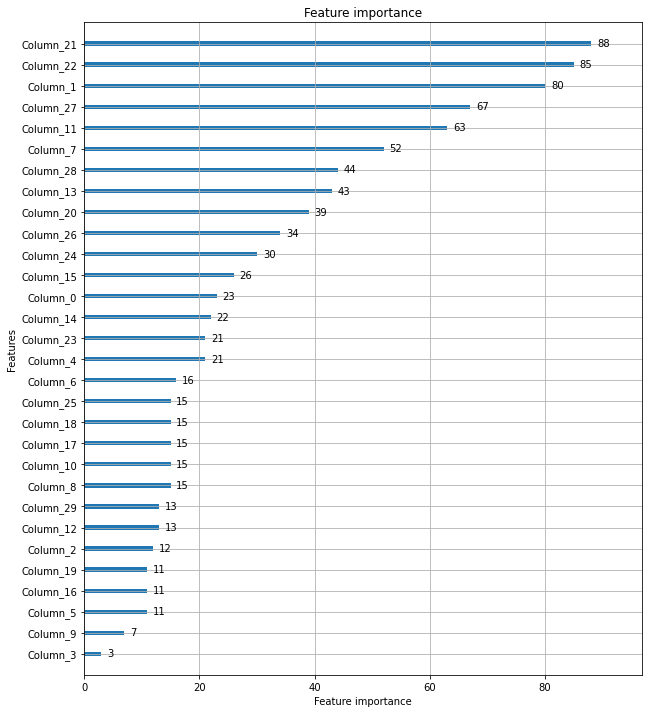

In [184]:
fig,ax=plt.subplots(figsize=(10,12))

plot_importance(lgbm_wrapper,ax=ax)